In [41]:
# imports
import sys
import os

sys.dont_write_bytecode = True

# For imports
sys.path.append(os.path.abspath(".."))

# Ising code
from ising_magnetic import ising
from ising_graph import IsingGraph
from ising_node import IsingNode

import numpy as np
import matplotlib.pyplot as plt

# Graph code
import networkx as nx
from nx_util import GraphUtil

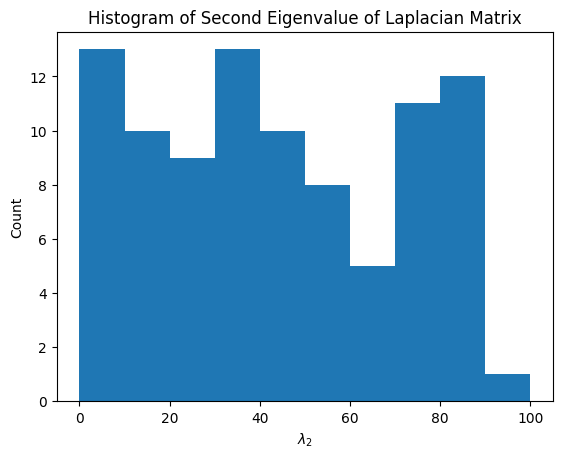

In [42]:
N = 100
p = 1/100
zeros = 0
second_eigen = []
for i in range(100):
    G = nx.fast_gnp_random_graph(N, np.random.rand())
    lap = nx.laplacian_matrix(G)
    lambdas = np.linalg.eigvals(np.array(lap.todense()))
    # sort in descending order
    np.real(lambdas).sort()
    # grab real part of lambda2
    if (abs(lambdas[1]) > 1e-5):
        second_eigen.append(lambdas[1])
# histogram
plt.hist(second_eigen, range=(0, 100))
plt.xlabel('$\\lambda_2$')
plt.ylabel('Count')
plt.title('Histogram of Second Eigenvalue of Laplacian Matrix')
plt.show()



  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [02:37<00:00,  3.15s/it]


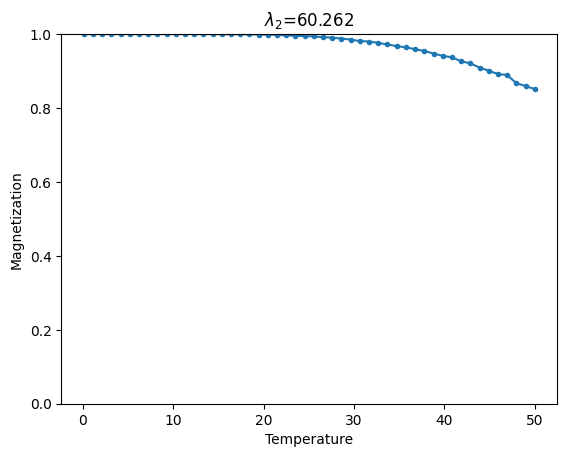

100%|██████████| 50/50 [02:00<00:00,  2.42s/it]


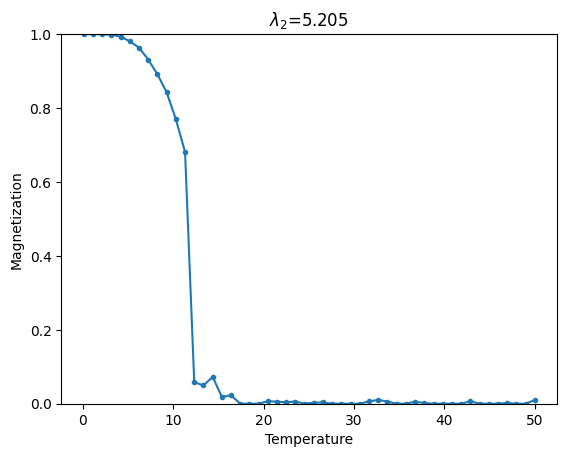

100%|██████████| 50/50 [02:45<00:00,  3.31s/it]


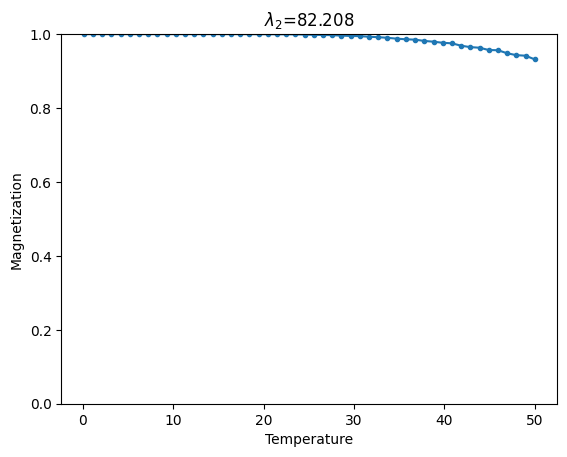

100%|██████████| 50/50 [02:33<00:00,  3.07s/it]


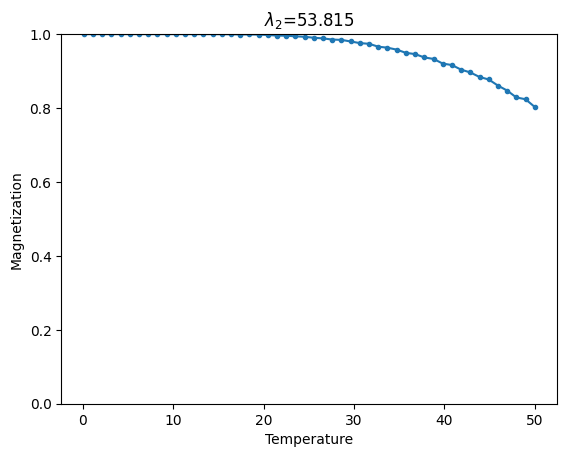

100%|██████████| 50/50 [02:47<00:00,  3.35s/it]


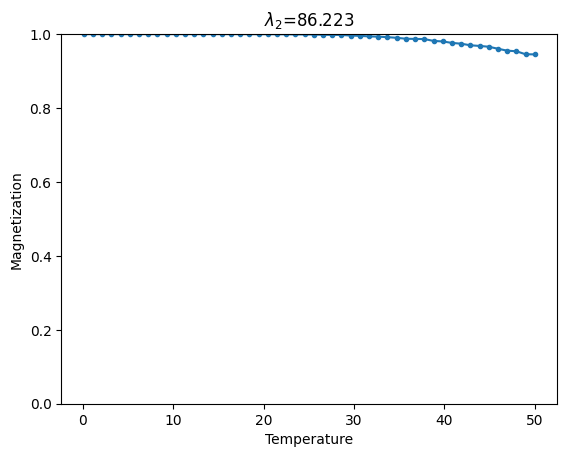

100%|██████████| 50/50 [02:46<00:00,  3.34s/it]


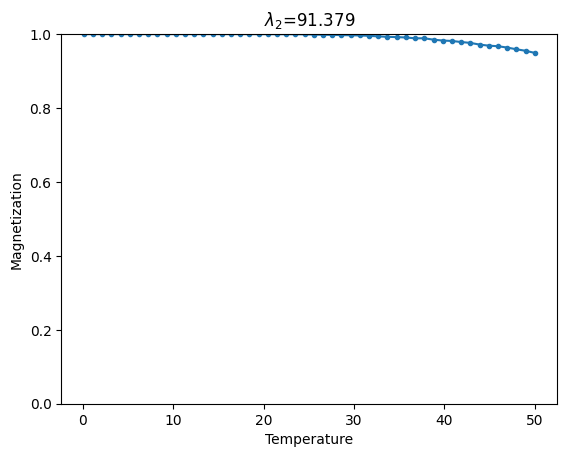

100%|██████████| 50/50 [02:40<00:00,  3.21s/it]


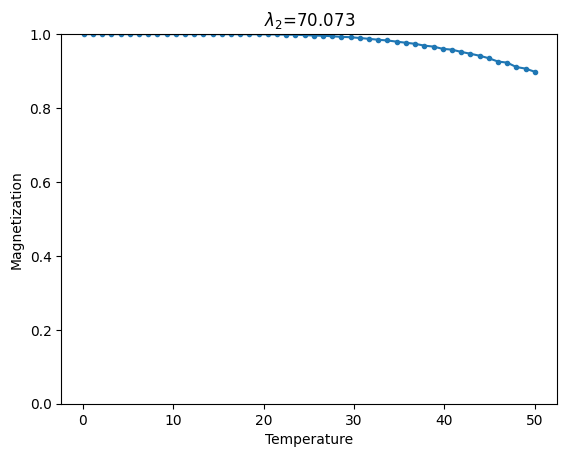

100%|██████████| 50/50 [02:51<00:00,  3.44s/it]


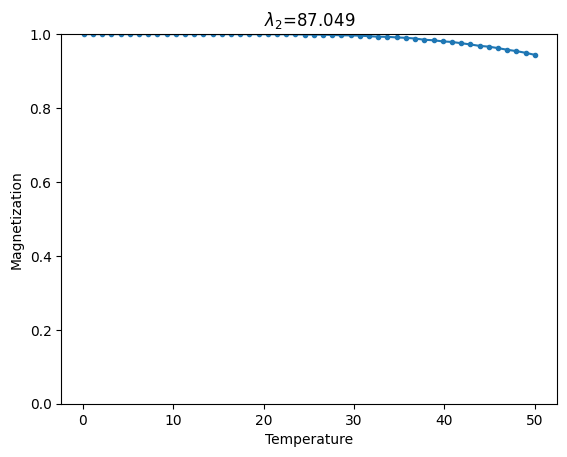

  0%|          | 0/50 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [44]:
# This method generates fairly even distribution of connectivity
from tqdm import tqdm
util = GraphUtil()

l_list = []
lambda_mag_map = {}

T_list = np.linspace(0.1, 50, 50)
num_steps = 2000

while len(l_list) < 10:
    G = nx.fast_gnp_random_graph(N, np.random.rand())
    lap = nx.laplacian_matrix(G)
    lambdas = np.linalg.eigvals(np.array(lap.todense()))
    # sort in descending order
    np.real(lambdas).sort()
    # grab real part of lambda2
    if (abs(lambdas[1]) > 1e-5):
        l_list.append(lambdas[1])
        # Magnetization
        M_values = []
        for T in tqdm(T_list):
            ising_graph = util.nx_to_ising_graph(G)
            ising(ising_graph, T, num_steps, reset=True)
            M_values.append(max(0, ising(ising_graph, T, num_steps)))
        lambda_mag_map[lambdas[1]] = M_values
        plt.plot(T_list, M_values, marker='.')
        plt.xlabel("Temperature")
        plt.ylabel("Magnetization")
        plt.ylim((0, 1))
        plt.title(f"$\\lambda_2$={lambdas[1]:.3f}")
        plt.show()

In [46]:
print(l_list)
print(len(l_list))

[60.26179181334439, 5.2051501096185255, 82.20848879769896, 53.81534469816437, 86.22267911970988, 91.37852668840426, 70.07286087555255, 87.04888954470191, 84.19268903322177]
9


17.34000275779667


100%|██████████| 50/50 [02:10<00:00,  2.61s/it]


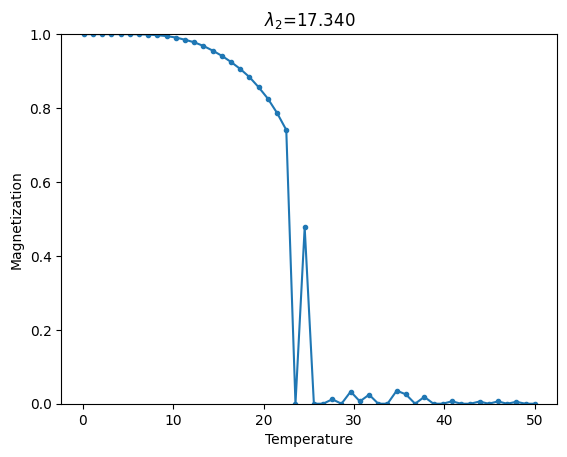

29.98133533820591


100%|██████████| 50/50 [03:57<00:00,  4.74s/it]


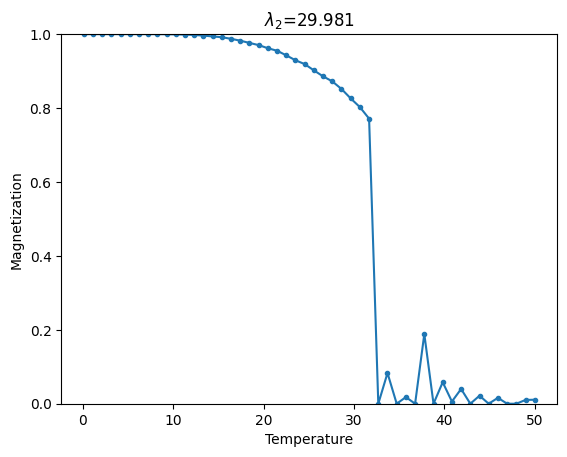

4.23832107012862


100%|██████████| 50/50 [02:28<00:00,  2.98s/it]


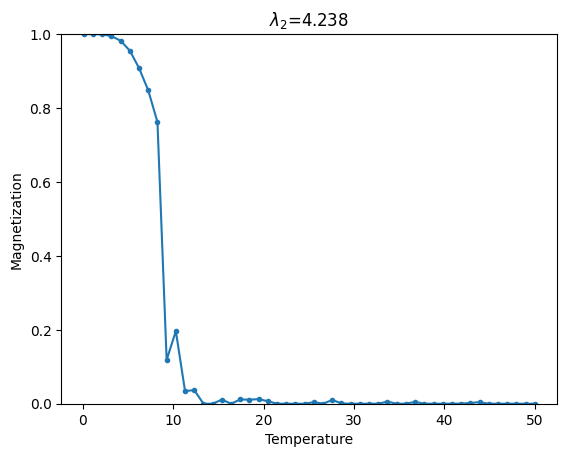

13.33944734557687


100%|██████████| 50/50 [02:59<00:00,  3.58s/it]


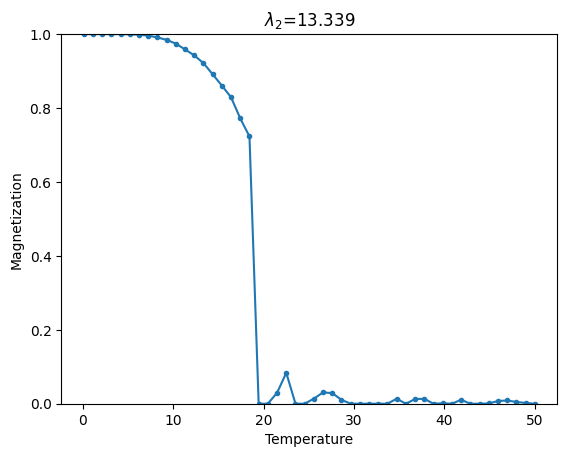

17.920105457642254


100%|██████████| 50/50 [02:59<00:00,  3.58s/it]


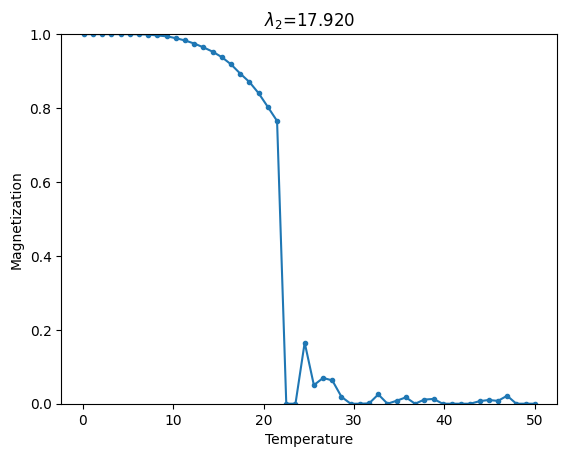

11.1695862688188


100%|██████████| 50/50 [02:49<00:00,  3.40s/it]


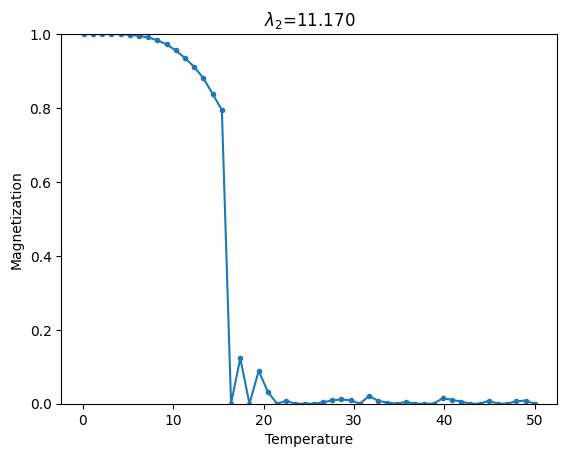

In [47]:
while len(l_list) < 15:
    G = nx.fast_gnp_random_graph(N, np.random.rand())
    lap = nx.laplacian_matrix(G)
    lambdas = np.linalg.eigvals(np.array(lap.todense()))
    # sort in descending order
    np.real(lambdas).sort()
    # grab real part of lambda2
    if (abs(lambdas[1]) > 1e-5 and abs(lambdas[1]) < 40):
        print(lambdas[1])
        l_list.append(lambdas[1])
        # Magnetization
        M_values = []
        for T in tqdm(T_list):
            ising_graph = util.nx_to_ising_graph(G)
            ising(ising_graph, T, num_steps, reset=True)
            M_values.append(max(0, ising(ising_graph, T, num_steps)))
        lambda_mag_map[lambdas[1]] = M_values
        plt.plot(T_list, M_values, marker='.')
        plt.xlabel("Temperature")
        plt.ylabel("Magnetization")
        plt.ylim((0, 1))
        plt.title(f"$\\lambda_2$={lambdas[1]:.3f}")
        plt.show()

[4.23832107012862, 5.2051501096185255, 11.1695862688188, 13.33944734557687, 17.34000275779667, 17.920105457642254, 29.98133533820591, 53.81534469816437, 60.26179181334439, 70.07286087555255, 82.20848879769896, 84.19268903322177, 86.22267911970988, 87.04888954470191, 91.37852668840426]


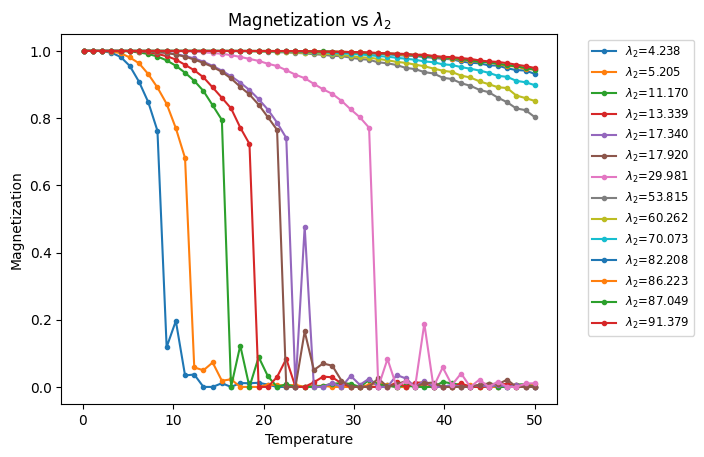

In [55]:
# print(l_list)
l_list.sort()
print(l_list)
for lam in l_list:
    if lam in lambda_mag_map:
        plt.plot(T_list, lambda_mag_map[lam], marker='.', label=f"$\\lambda_2$={lam:.3f}")

plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs $\\lambda_2$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()

In [61]:
small = [0, 1, 5, 10]
small_mag_map = {}
T_list = np.linspace(.1, 10, 20)
for i in range(len(small) - 1):
    G = nx.fast_gnp_random_graph(N, np.random.rand())
    lap = nx.laplacian_matrix(G)
    lambdas = np.linalg.eigvals(np.array(lap.todense()))
    # sort in descending order
    np.real(lambdas).sort()
    while not(lambdas[1] < small[i + 1] and lambdas[1] > small[i]):
        G = nx.fast_gnp_random_graph(N, np.random.rand())
        lap = nx.laplacian_matrix(G)
        lambdas = np.linalg.eigvals(np.array(lap.todense()))
    # sort in descending order
        np.real(lambdas).sort()
    print(lambdas[1])
    M_values = []
    for T in tqdm(T_list):
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(max(0, ising(ising_graph, T, num_steps)))
    small_mag_map[lambdas[1]] = M_values

0.648309425781829


100%|██████████| 20/20 [00:46<00:00,  2.31s/it]


1.6569885178052886


100%|██████████| 20/20 [00:47<00:00,  2.38s/it]


5.84879364875158


100%|██████████| 20/20 [00:50<00:00,  2.52s/it]


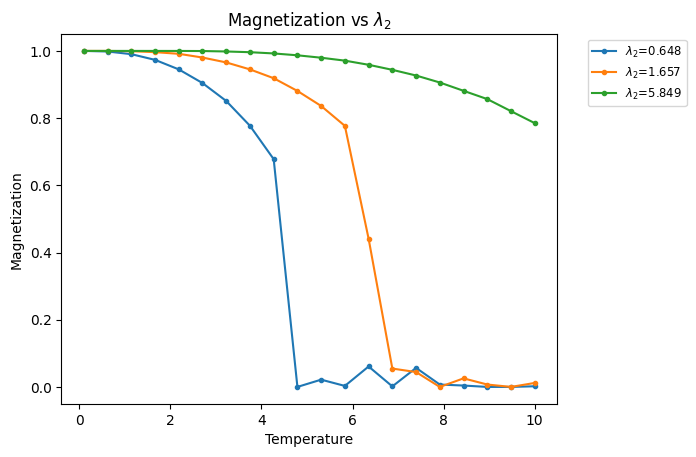

In [ ]:
for lam in small_mag_map:
    plt.plot(T_list, small_mag_map[lam], marker='.', label=f"$\\lambda_2$={lam:.3f}")

plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs $\\lambda_2$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.show()

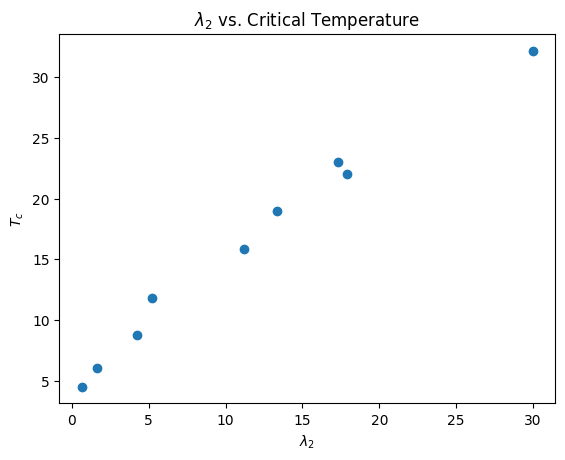

In [68]:
# Find relation between T_c and lambda

lambdas = []
T_c_list = []

# Handle larger lambdas
T_list = np.linspace(0.1, 50, 50)
for lam in lambda_mag_map:
    if lam < 30:
        lambdas.append(lam)
        for i in range(len(lambda_mag_map[lam]) - 1):
            if lambda_mag_map[lam][i] - lambda_mag_map[lam][i + 1] > 0.1:
                T_c_list.append((T_list[i] + T_list[i + 1]) / 2)
                break

# handle small lambda
T_list = np.linspace(0.1, 10, 20)
for lam in small_mag_map:
    if lam < 5:
        lambdas.append(lam)
        for i in range(len(small_mag_map[lam]) - 1):
            if small_mag_map[lam][i] - small_mag_map[lam][i + 1] > 0.1:
                T_c_list.append((T_list[i] + T_list[i + 1]) / 2)
                break
plt.scatter(lambdas, T_c_list, marker='o')
plt.xlabel("$\\lambda_2$")
plt.ylabel("$T_c$")
plt.title("$\\lambda_2$ vs. Critical Temperature")
plt.show()

In [73]:
# Seems linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()

reg.fit(np.array(lambdas).reshape(-1, 1), np.array(T_c_list).reshape((-1, 1)))
pred = reg.predict(np.array(lambdas).reshape(-1, 1))
print(f"r2: {r2_score(lambdas, pred):.3f}")
print(reg.coef_)
print(reg.intercept_)

r2: 0.731
[[0.94188829]]
[5.28874143]
